In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
money = pd.read_csv("4.2.17_근로소득_연말정산_기부금_세액공제_현황2017_20230320000051.csv", encoding= "cp949")
money

,과세대상근로소득규모별(1),과세대상근로소득규모별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,과세대상근로소득규모별(1),과세대상근로소득규모별(2),정치자금기부금,정치자금기부금,법정기부금,법정기부금,우리사주조합기부금,우리사주조합기부금,지정기부금(종교단체외),지정기부금(종교단체외),지정기부금(종교단체),지정기부금(종교단체)
1,과세대상근로소득규모별(1),과세대상근로소득규모별(2),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원)
2,합계,소계,306812,20061,1916727,61746,6064,776,4336405,393884,1681109,835718
3,결정세액이 있는자,소계,297253,19125,1831351,55281,5631,743,4096866,375430,1458494,793432
4,결정세액이 있는자,1천만 이하,-,-,-,-,-,-,-,-,-,-
5,결정세액이 있는자,1.5천만 이하,95,0,118,0,-,-,86,4,69,7
6,결정세액이 있는자,2천만 이하,2809,31,4735,21,14,-,7417,207,3419,377
7,결정세액이 있는자,3천만 이하,33658,676,87328,562,242,10,211263,8049,53684,7940
8,결정세액이 있는자,4천만 이하,35482,1290,185970,1585,740,45,437998,22180,125196,33605
9,결정세액이 있는자,4.5천만 이하,17614,798,110588,1174,635,41,273919,16733,84017,28221


In [3]:
money_religion = money.iloc[4:19,[1,10,11]]
money_religion

,과세대상근로소득규모별(2),2021.8,2021.9
4,1천만 이하,-,-
5,1.5천만 이하,69,7
6,2천만 이하,3419,377
7,3천만 이하,53684,7940
8,4천만 이하,125196,33605
9,4.5천만 이하,84017,28221
10,5천만 이하,91644,34208
11,6천만 이하,189727,79514
12,8천만 이하,348044,170865
13,1억 이하,257014,149441


In [4]:
money_religion.columns = ['Tax_amount', '인원', '지정기부금']

In [5]:
money_religion = money_religion.set_index('Tax_amount')

In [6]:
money_religion.iloc[0,[0,1]] = 0

In [7]:
df_money = money_religion.apply(pd.to_numeric)

In [8]:
df_money.dtypes

인원       int64
지정기부금    int64
dtype: object

In [9]:
each = ((df_money['지정기부금']*1000000) / df_money['인원']).round(0)

In [10]:
each

Tax_amount
1천만 이하            NaN
1.5천만 이하     101449.0
2천만 이하       110266.0
3천만 이하       147903.0
4천만 이하       268419.0
4.5천만 이하     335896.0
5천만 이하       373270.0
6천만 이하       419097.0
8천만 이하       490929.0
1억 이하        581451.0
2억 이하        785924.0
3억 이하       1473082.0
5억 이하       2209664.0
10억 이하      3684618.0
10억 초과      8472961.0
dtype: float64

In [11]:
money_religion0 = pd.concat([df_money, each], axis = 1)
money_religion0.columns = [ '인원', '지정기부금', 'Donation_per']

In [12]:
money = money_religion0.reset_index()

In [13]:
money

,Tax_amount,인원,지정기부금,Donation_per
0,1천만 이하,0,0,NaN
1,1.5천만 이하,69,7,101449.0
2,2천만 이하,3419,377,110266.0
3,3천만 이하,53684,7940,147903.0
4,4천만 이하,125196,33605,268419.0
5,4.5천만 이하,84017,28221,335896.0
6,5천만 이하,91644,34208,373270.0
7,6천만 이하,189727,79514,419097.0
8,8천만 이하,348044,170865,490929.0
9,1억 이하,257014,149441,581451.0


세금으로 인해 추산된 금액만 835718000000원 (8천억원) 규모이며, 한 사람당 위와 같은 경제적 가치를 가지고 있다.   
즉, 교회에게 한 사람 한 사람은 경제적 가치를 창출할 수 있는 수단이자 주 수입원이다. 

In [14]:
import plotnine
from plotnine import *

C:\Users\Samsung\anaconda3\lib\site-packages\plotnine\layer.py:391: PlotnineWarning: position_stack : Removed 1 rows containing missing values.


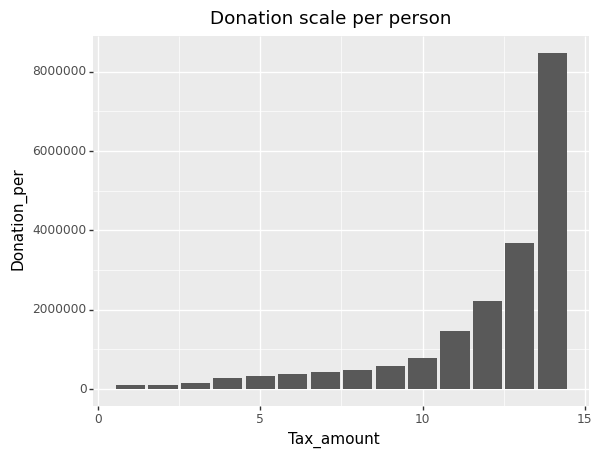

<ggplot: (162026382830)>

In [25]:
df = pd.DataFrame({
    'Tax_amount':list(range(15)),
    'Donation_per': money['Donation_per'],
    'letter' : money['Tax_amount']
})

(ggplot(df)
 + geom_col(aes(x='Tax_amount',y='Donation_per'))         
 + ggtitle('Donation scale per person ')
)

결정세액의 규모가 커질수록 종교에 납부하는 금액의 크기가 급격히 증가한다. 

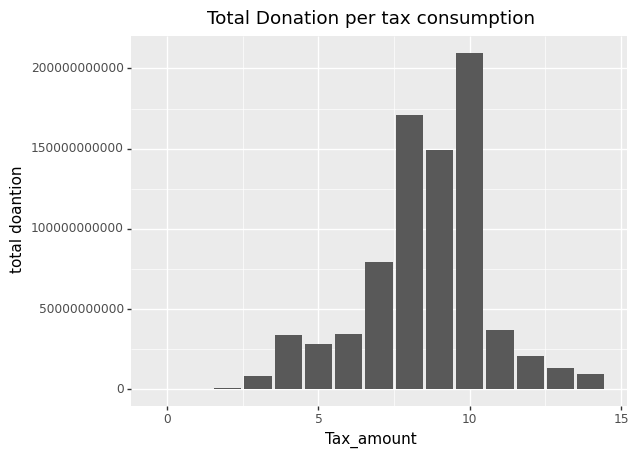

<ggplot: (162026753808)>

In [28]:
df = pd.DataFrame({
    'Tax_amount':list(range(15)),
    'total doantion': money['지정기부금']*1000000,
    'letter' : money['Tax_amount']
})

(ggplot(df)
 + geom_col(aes(x='Tax_amount',y='total doantion'))         
 + ggtitle('Total Donation per tax consumption')
)

In [29]:
money = pd.read_csv("종교기관_기부_경험과_기부횟수_및_기부금액_20230320000008.csv", encoding= "cp949")
money

,특성별(1),특성별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10
0,특성별(1),특성별(2),경험 없음 (%),경험 있음 (%),기부횟수,기부횟수,기부횟수,기부횟수,기부금액,기부금액,기부금액,기부금액,기부금액
1,특성별(1),특성별(2),소계,소계,평균(연) (회),분기별 1회 미만 (%),분기별 1회~4회 미만 (%),월1회 이상 (%),평균 (만원),5만원 미만 (%),5~10만원 미만 (%),10~50만원 미만 (%),50만원 이상 (%)
2,전체,소계,60.5,39.5,9.1,71.1,25.6,3.3,71.4,5.2,8.4,42.0,44.4
3,성별,남,76.0,24.0,8.2,80.3,19.7,0.0,161.4,0.0,0.0,32.5,67.5
4,성별,여,54.6,45.4,9.3,67.7,27.8,4.5,53.6,6.3,10.0,43.9,39.8
5,연령별,15-19세,100.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,연령별,20-29세,100.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,연령별,30-39세,85.0,15.0,17.5,85.0,10.4,4.6,67.1,0.0,0.0,30.5,69.5
8,연령별,40-49세,58.4,41.6,6.0,77.2,22.8,0.0,78.1,27.0,0.0,29.5,43.5
9,연령별,50-59세,60.2,39.8,6.3,77.3,22.7,0.0,59.6,5.8,13.1,29.0,52.1
